<a href="https://colab.research.google.com/github/Farehayasmin/Heart_Failure_Prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/MLLAB/heart.csv')

# Display basic information
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

First 5 rows:
   Age Sex ChestPainType  Restin

**Univariate Analysis**

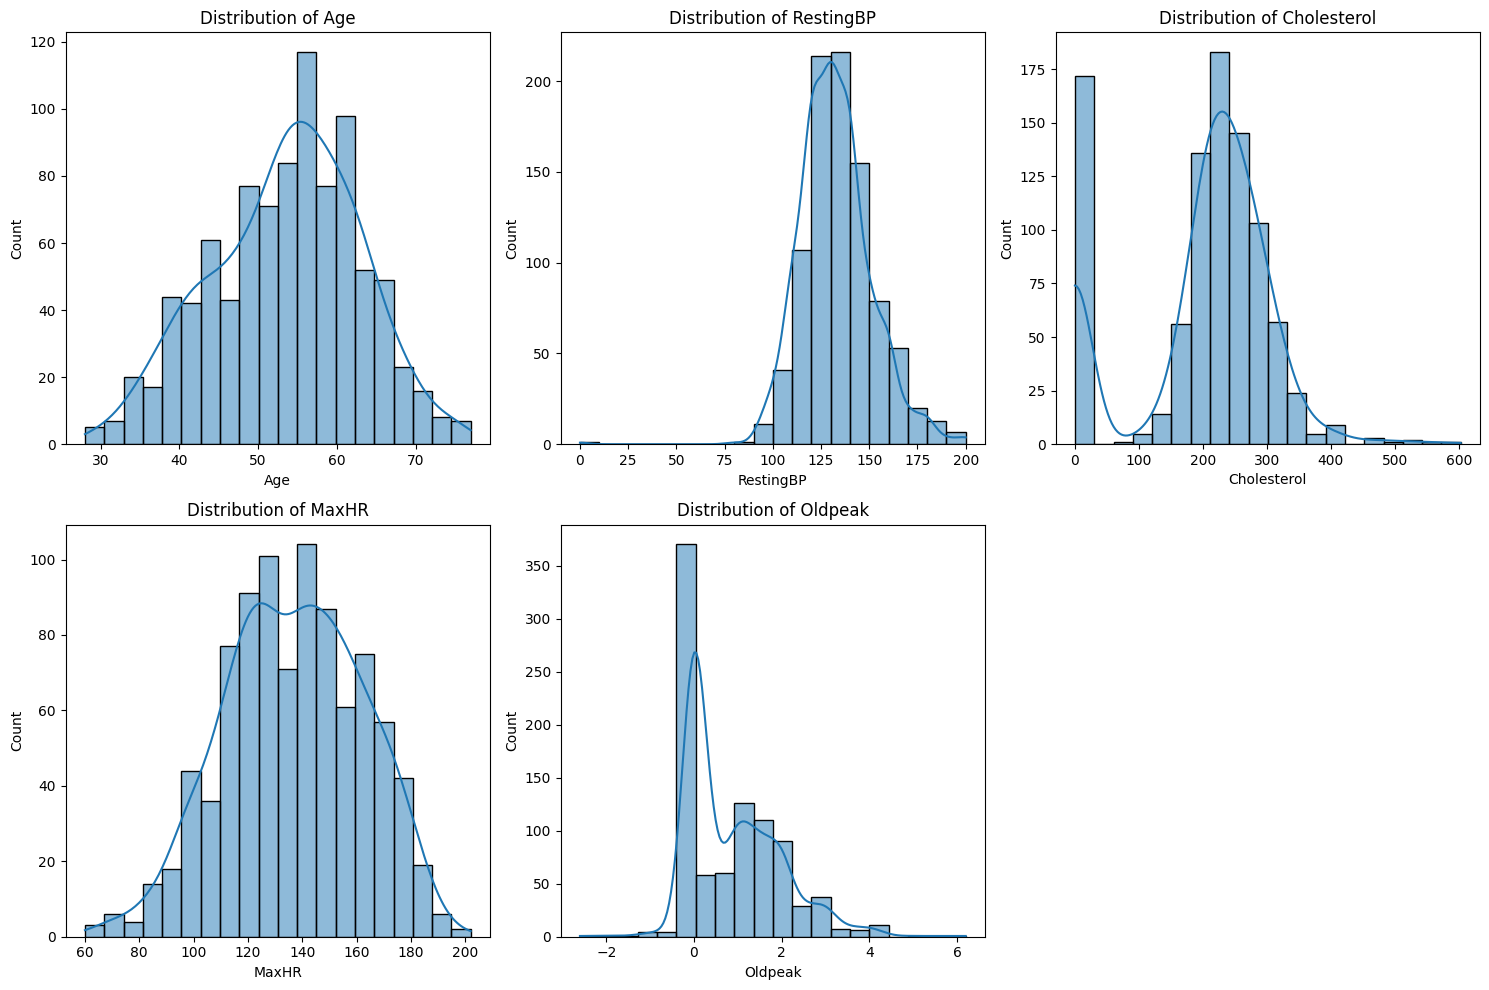

In [ ]:
# Histograms for numerical variables
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

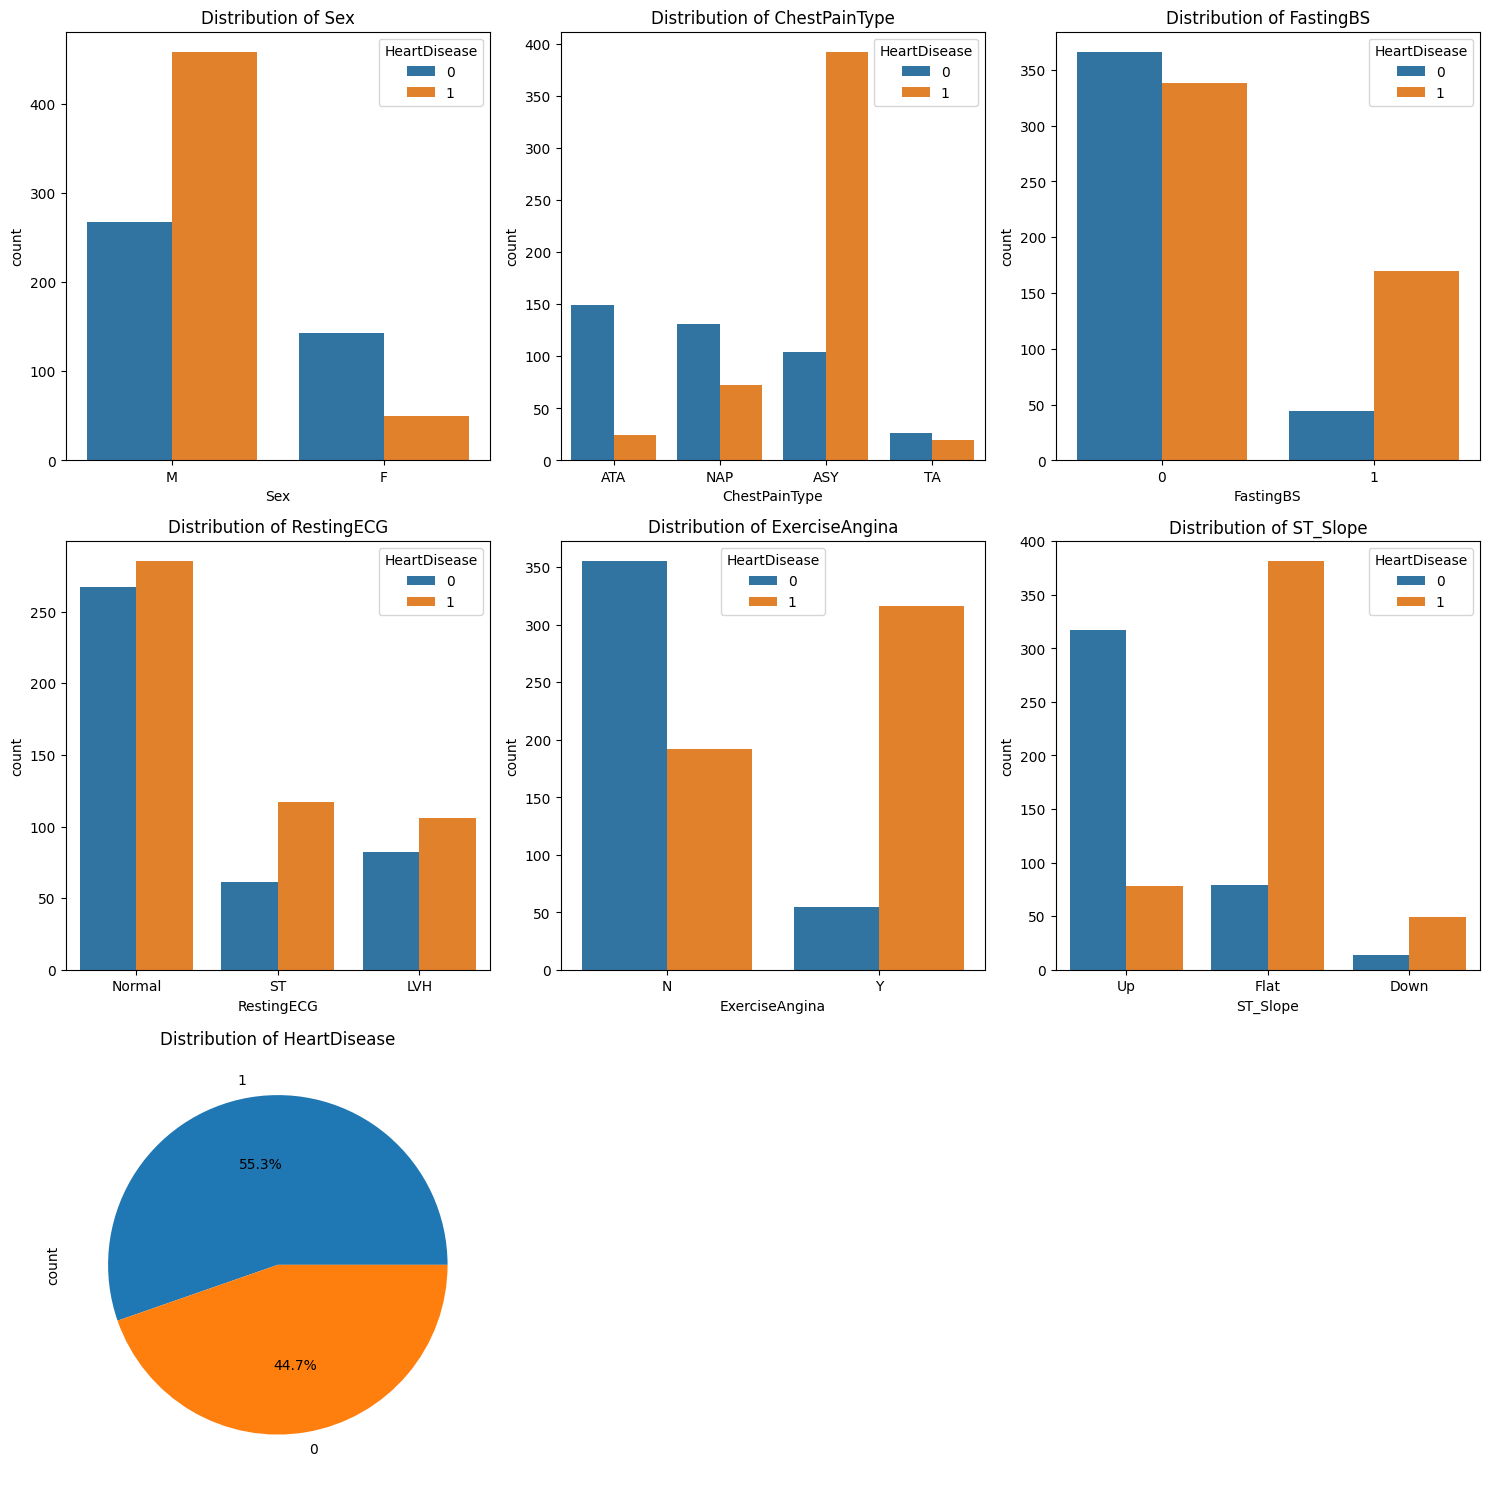

In [ ]:
# Bar plots for categorical variables
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    if col == 'HeartDisease':
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    else:
        sns.countplot(data=df, x=col, hue='HeartDisease')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Bivariate Analysis

Numerical vs Target (HeartDisease)

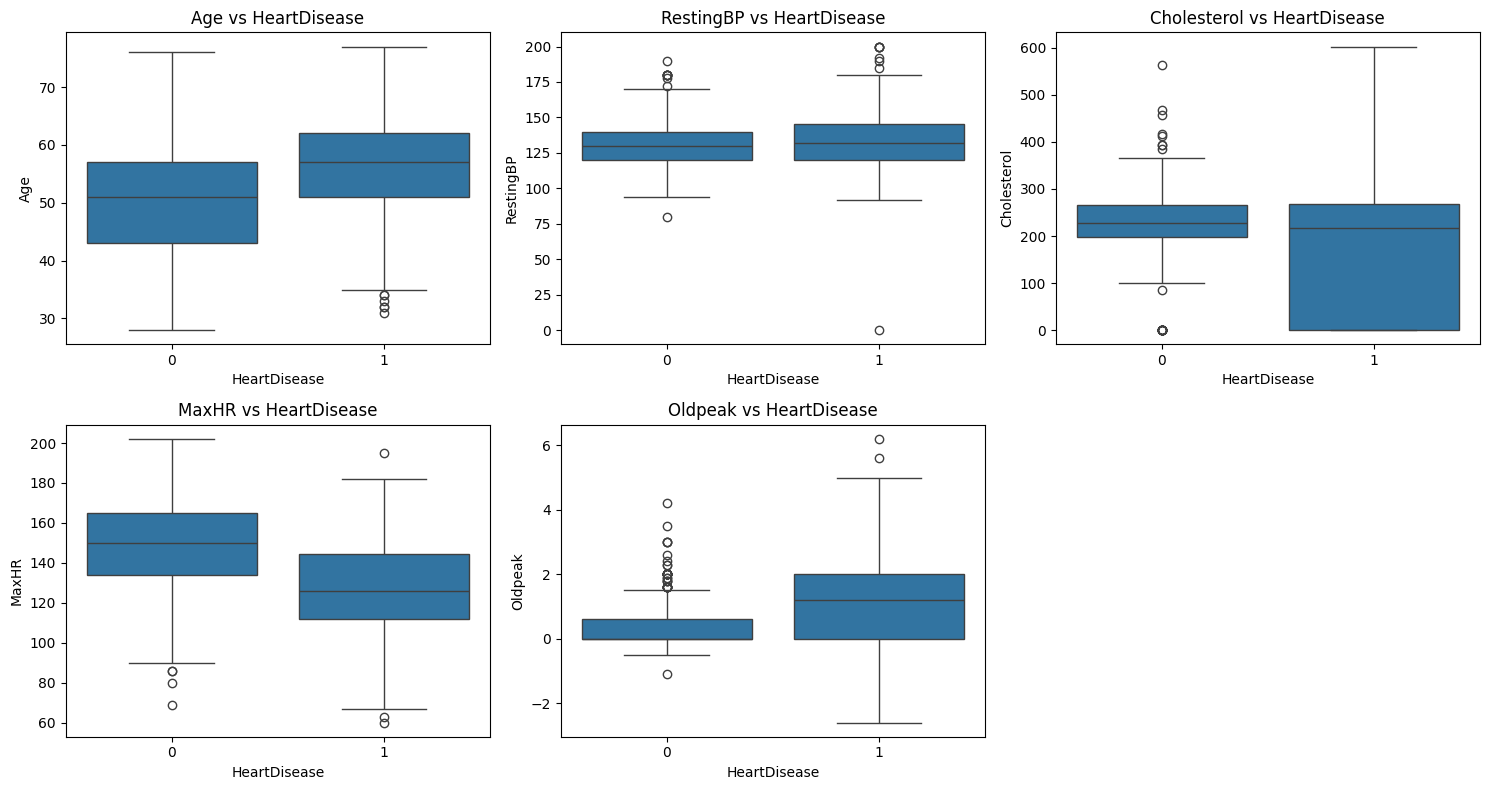

In [ ]:
# Boxplots for numerical variables vs HeartDisease
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='HeartDisease', y=col, data=df)
    plt.title(f'{col} vs HeartDisease')
plt.tight_layout()
plt.show()

**Scatter Plots for Numerical Variable Relationships**

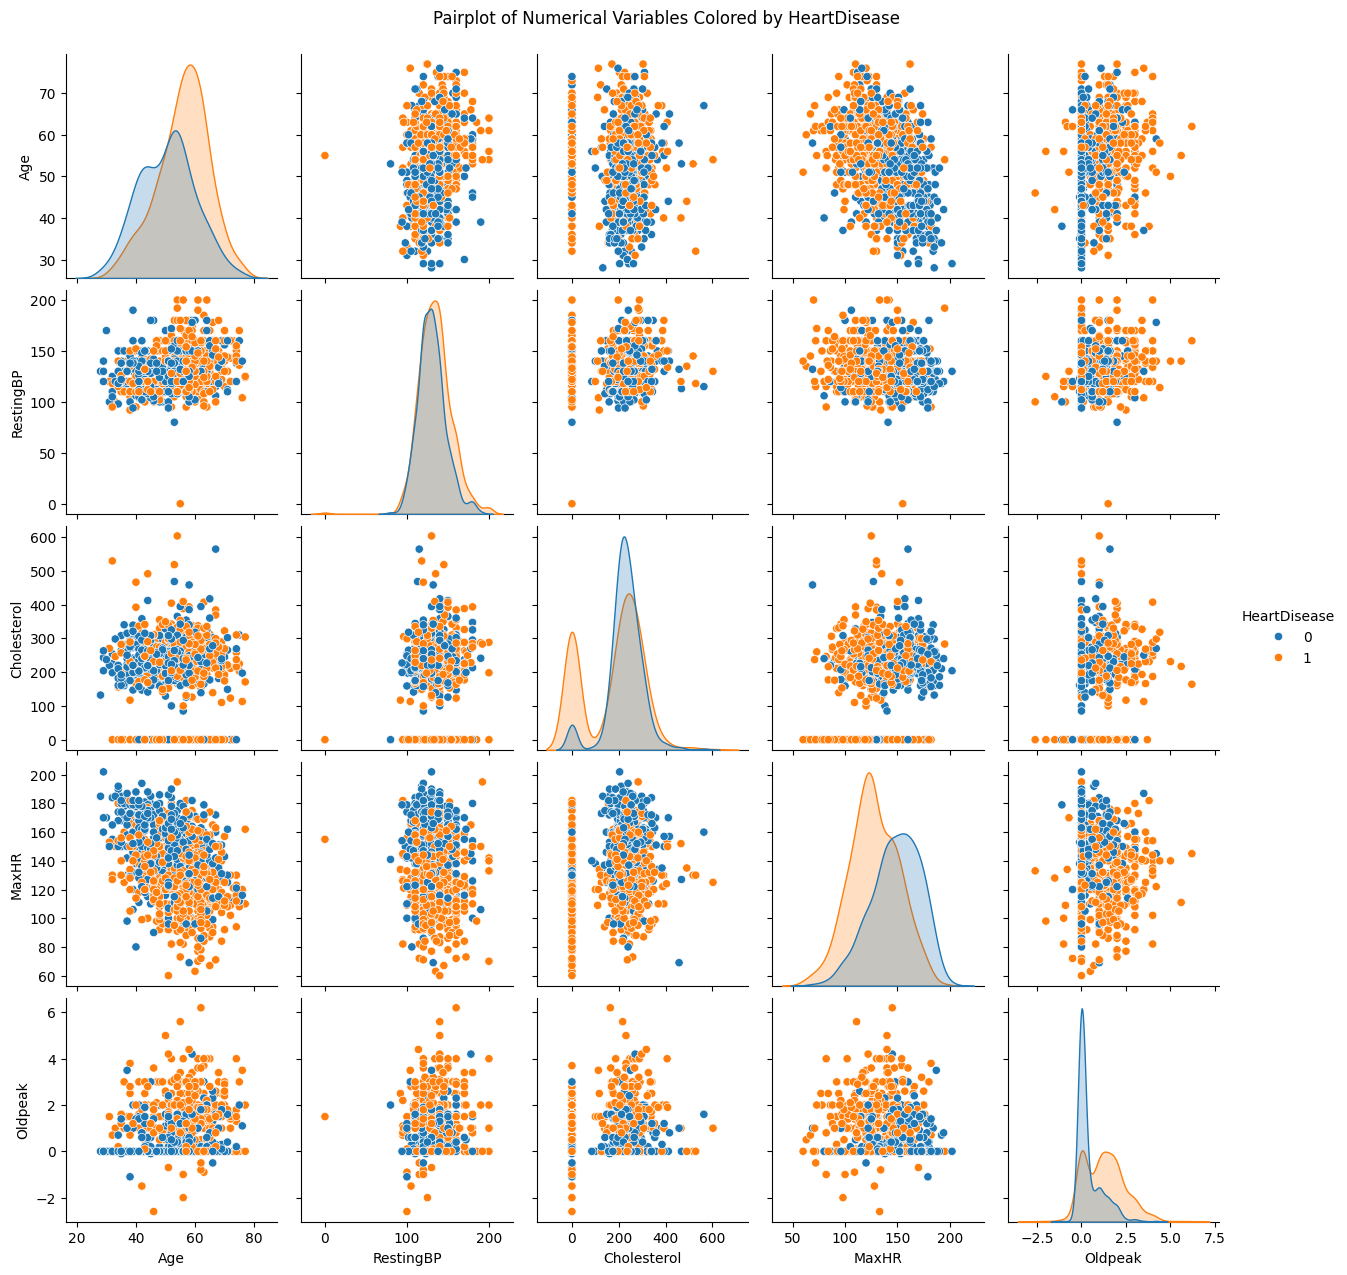

In [ ]:
# Scatter plots for numerical variable relationships
sns.pairplot(df[num_cols + ['HeartDisease']], hue='HeartDisease', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables Colored by HeartDisease', y=1.02)
plt.show()

**Correlation Heatmap**

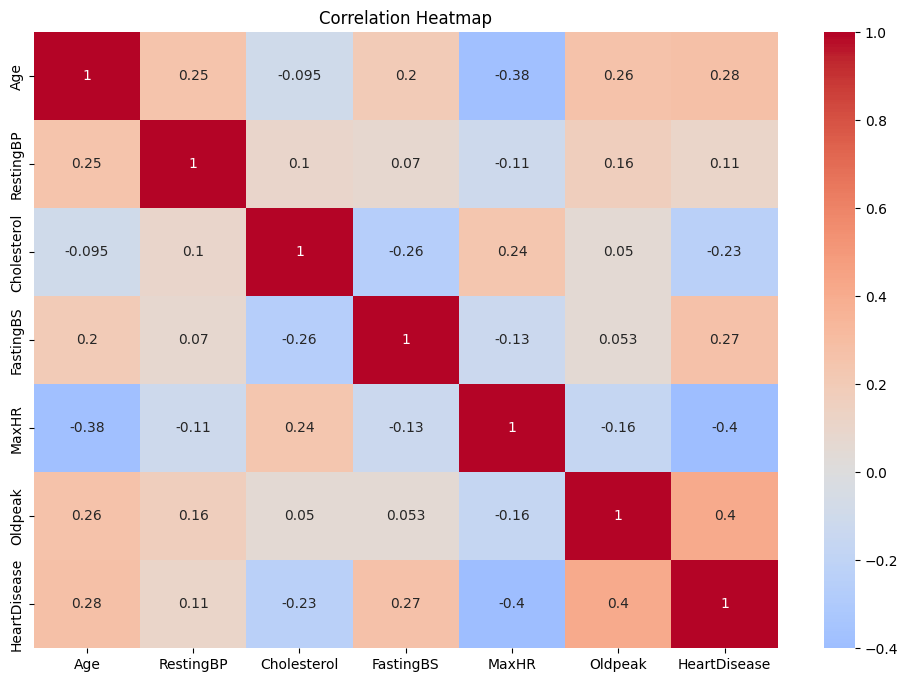

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Age vs MaxHR Colored by HeartDisease

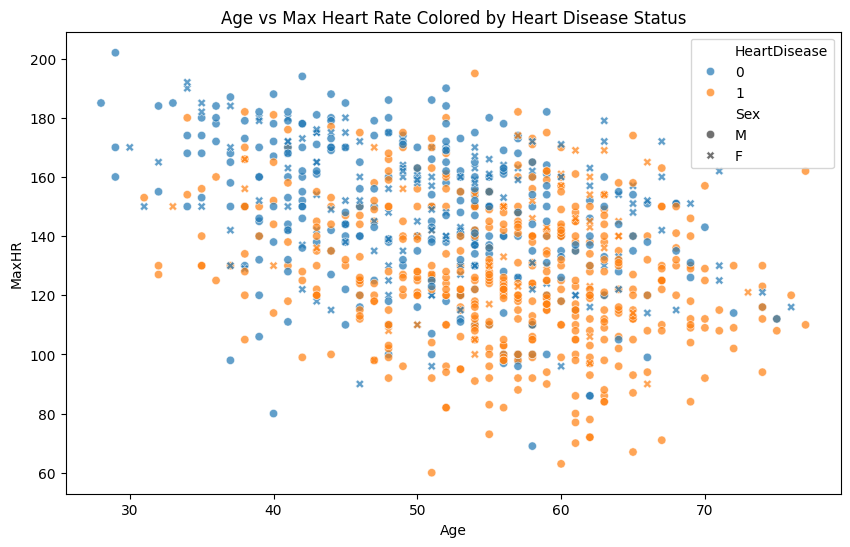

In [ ]:
# Scatter plot with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease', style='Sex', alpha=0.7)
plt.title('Age vs Max Heart Rate Colored by Heart Disease Status')
plt.show()

**TASK-2**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy import stats

In [ ]:
## 1. Null Value Handling
print("=== Null Value Handling ===")
print("Null values before handling:")
print(df.isnull().sum())

# Check for 0 values in numerical columns that shouldn't be 0
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
print("\nCount of 0 values in numerical columns:")
for col in num_cols:
    if col != 'Oldpeak':  # Oldpeak can be 0
        print(f"{col}: {len(df[df[col] == 0])}")


=== Null Value Handling ===
Null values before handling:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Count of 0 values in numerical columns:
Age: 0
RestingBP: 1
Cholesterol: 172
MaxHR: 0


In [ ]:
# Replace 0 values with median (for Cholesterol and RestingBP)
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].median())
df['RestingBP'] = df['RestingBP'].replace(0, df['RestingBP'].median())

print("\nNull values after handling:")
print(df.isnull().sum())


Null values after handling:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
## 2. Skewness Check and Outlier Detection
print("\n=== Skewness Analysis ===")
for col in num_cols:
    skewness = df[col].skew()
    print(f"{col}: Skewness = {skewness:.2f}")
    if abs(skewness) > 0.5:
        print(f"  -> {col} is skewed (|skewness| > 0.5)")



=== Skewness Analysis ===
Age: Skewness = -0.20
RestingBP: Skewness = 0.61
  -> RestingBP is skewed (|skewness| > 0.5)
Cholesterol: Skewness = 1.54
  -> Cholesterol is skewed (|skewness| > 0.5)
MaxHR: Skewness = -0.14
Oldpeak: Skewness = 1.02
  -> Oldpeak is skewed (|skewness| > 0.5)


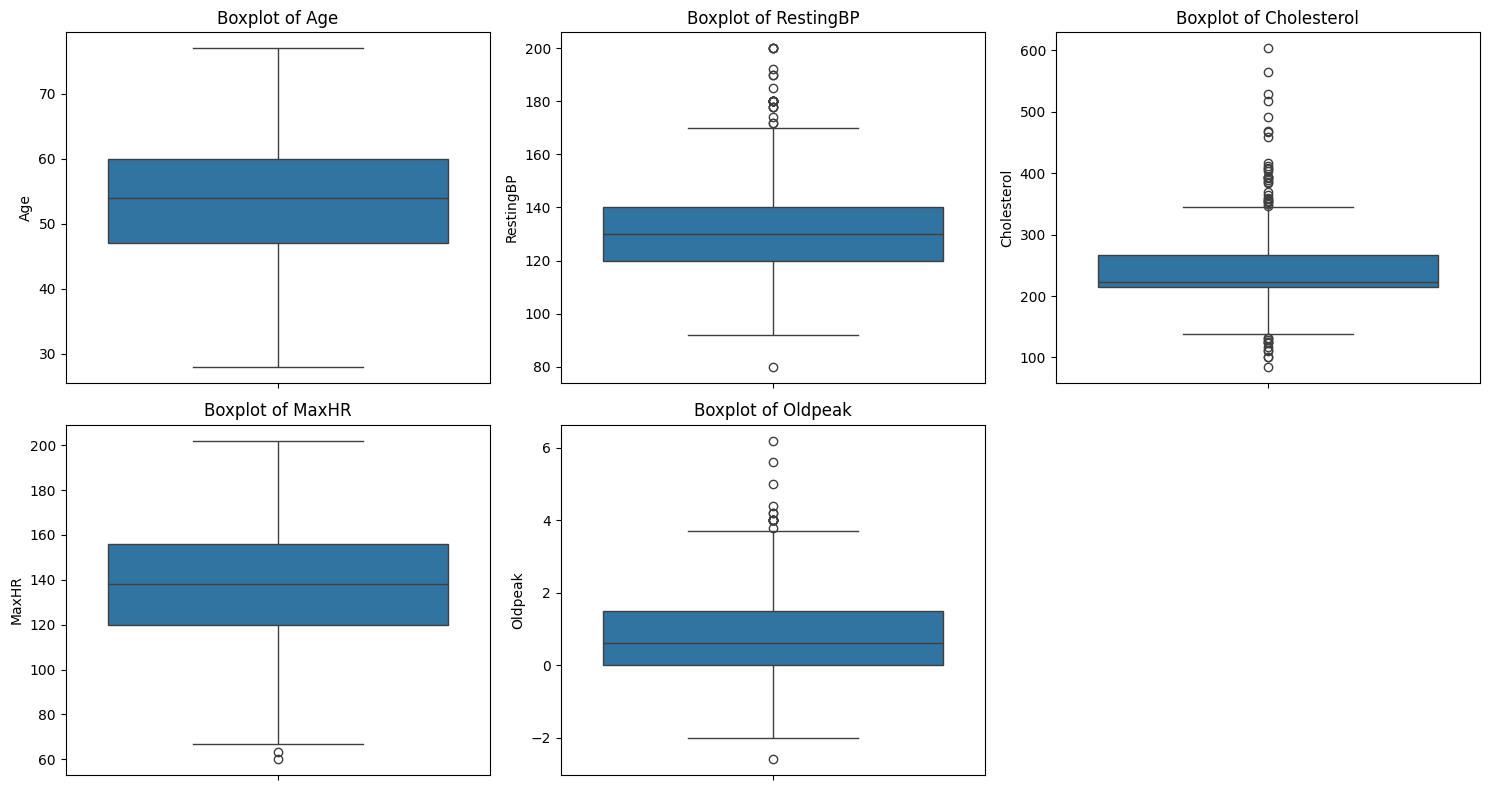

In [ ]:
# Boxplot for outlier visualization
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Handling outliers - Winsorization for highly skewed columns
winsorize_cols = ['Cholesterol', 'RestingBP', 'Oldpeak']
for col in winsorize_cols:
    df[col] = stats.mstats.winsorize(df[col], limits=[0.05, 0.05])


In [ ]:
## 3. Data Scaling
print("\n=== Data Scaling ===")
# Separate features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Robust Scaling (less affected by outliers)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Data after scaling (sample):")
print(X_scaled.head())


=== Data Scaling ===
Data after scaling (sample):
        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Sex_M  \
0 -1.076923        0.5     1.245283        0.0  0.944444 -0.400000    0.0   
1 -0.384615        1.5    -0.811321        0.0  0.500000  0.266667   -1.0   
2 -1.307692        0.0     1.132075        0.0 -1.111111 -0.400000    0.0   
3 -0.461538        0.4    -0.169811        0.0 -0.833333  0.600000   -1.0   
4  0.000000        1.0    -0.528302        0.0 -0.444444 -0.400000    0.0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  \
0                1.0                0.0               0.0                0.0   
1                0.0                1.0               0.0                0.0   
2                1.0                0.0               0.0               -1.0   
3                0.0                0.0               0.0                0.0   
4                0.0                1.0               0.0                0.0   

   Re


=== Class Imbalance ===
Class distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64

Ratio: 1.24


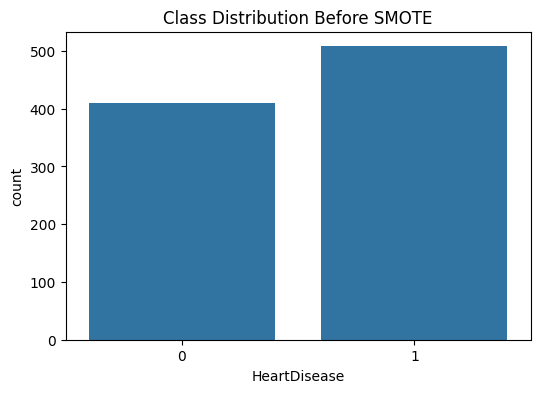


Class imbalance is not significant - SMOTE not applied


In [ ]:
## 4. Class Imbalance Check and Handling
print("\n=== Class Imbalance ===")
print("Class distribution:")
print(y.value_counts())
print(f"\nRatio: {len(y[y==1])/len(y[y==0]):.2f}")

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')
plt.show()

# Apply SMOTE only if imbalance is significant (e.g., ratio < 0.8 or > 1.25)
if len(y[y==1])/len(y[y==0]) < 0.8 or len(y[y==1])/len(y[y==0]) > 1.25:
    print("\nApplying SMOTE to handle class imbalance")
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_scaled, y)

    print("\nClass distribution after SMOTE:")
    print(y_res.value_counts())

    plt.figure(figsize=(6, 4))
    sns.countplot(x=y_res)
    plt.title('Class Distribution After SMOTE')
    plt.show()
else:
    print("\nClass imbalance is not significant - SMOTE not applied")
    X_res, y_res = X_scaled, y

In [ ]:
## 5. Train-Test Split
print("\n=== Train-Test Split ===")
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())


=== Train-Test Split ===
Training set size: 734 samples
Test set size: 184 samples

Class distribution in training set:
HeartDisease
1    406
0    328
Name: count, dtype: int64

Class distribution in test set:
HeartDisease
1    102
0     82
Name: count, dtype: int64


**Task-3**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [ ]:
## 1. Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}


=== Training Logistic Regression ===
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        82
           1       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



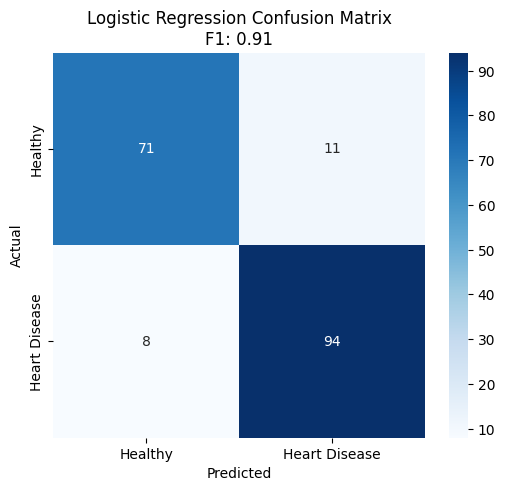

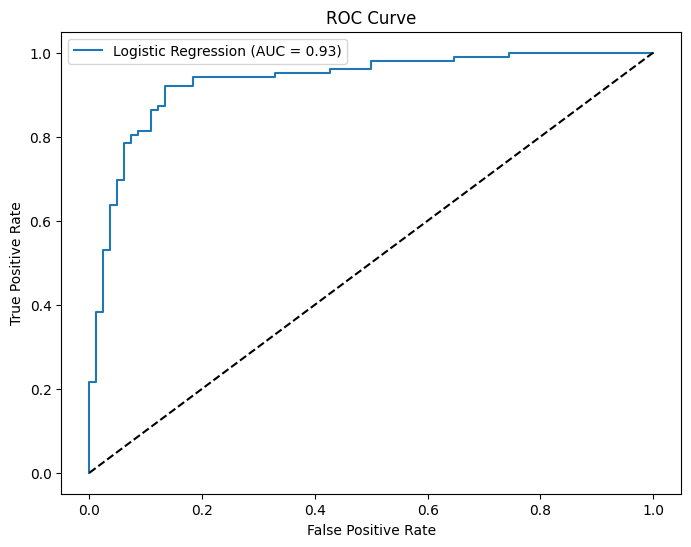


=== Training Random Forest ===
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        82
           1       0.86      0.85      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



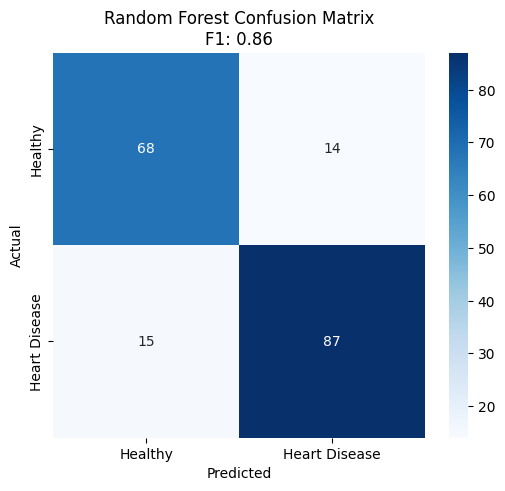

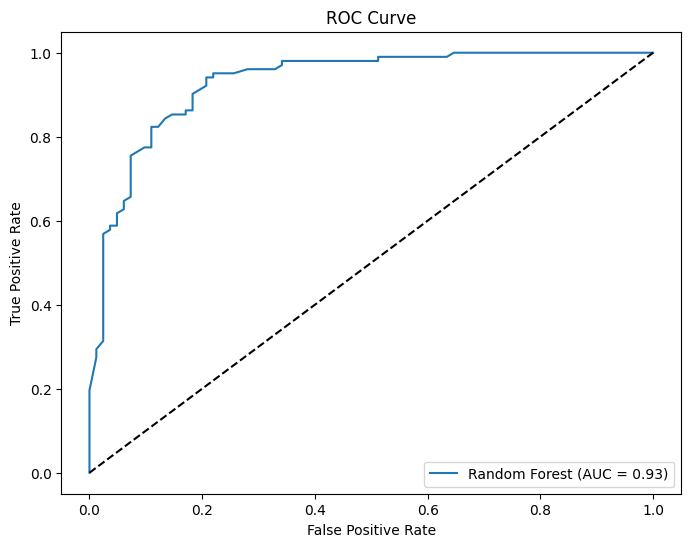


=== Training SVM ===
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        82
           1       0.87      0.87      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



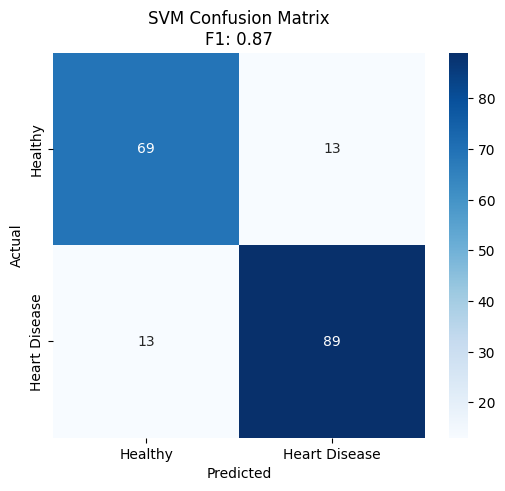

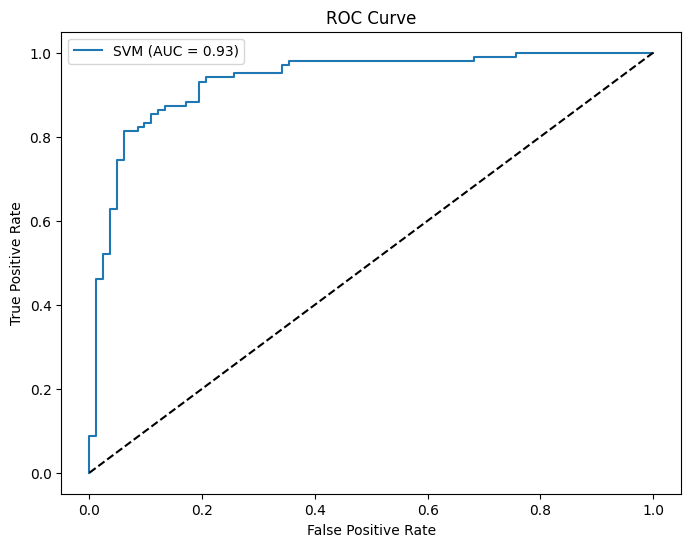

In [ ]:
## 2. Train and Evaluate Individual Models
results = {}
for name, model in models.items():
    print(f"\n=== Training {name} ===")

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }
    results[name] = metrics

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Healthy', 'Heart Disease'],
                yticklabels=['Healthy', 'Heart Disease'])
    plt.title(f'{name} Confusion Matrix\nF1: {metrics["F1 Score"]:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve if available
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {metrics["ROC AUC"]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()


=== Training Ensemble Model (Voting Classifier) ===
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



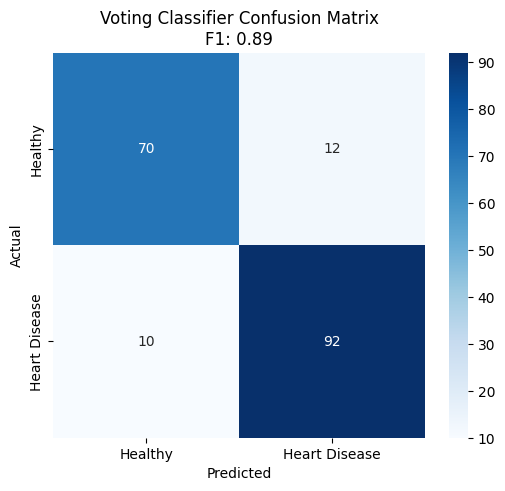

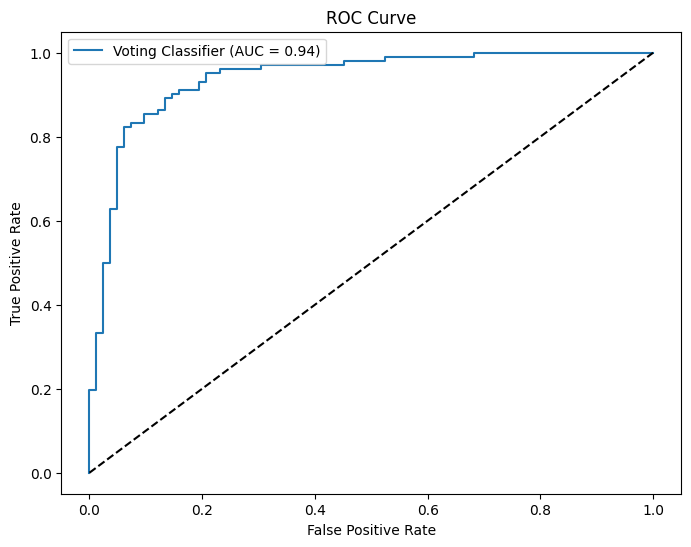

In [ ]:
##  Ensemble Model (Voting Classifier)
print("\n=== Training Ensemble Model (Voting Classifier) ===")

# Create voting classifier with our three models
voting_clf = VotingClassifier(
    estimators=[
        ('lr', models["Logistic Regression"]),
        ('rf', models["Random Forest"]),
        ('svm', models["SVM"])
    ],
    voting='soft'
)

# Train ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = voting_clf.predict(X_test)
y_prob_ensemble = voting_clf.predict_proba(X_test)[:, 1]

# Calculate metrics
ensemble_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_ensemble),
    'Precision': precision_score(y_test, y_pred_ensemble),
    'Recall': recall_score(y_test, y_pred_ensemble),
    'F1 Score': f1_score(y_test, y_pred_ensemble),
    'ROC AUC': roc_auc_score(y_test, y_prob_ensemble)
}
results["Voting Classifier"] = ensemble_metrics

# Print classification report
print(classification_report(y_test, y_pred_ensemble))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Heart Disease'],
            yticklabels=['Healthy', 'Heart Disease'])
plt.title(f'Voting Classifier Confusion Matrix\nF1: {ensemble_metrics["F1 Score"]:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_ensemble)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Voting Classifier (AUC = {ensemble_metrics["ROC AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


=== Model Performance Comparison ===
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.896739   0.895238  0.921569  0.908213  0.932329
Voting Classifier    0.880435   0.884615  0.901961  0.893204  0.939264
SVM                  0.858696   0.872549  0.872549  0.872549  0.933644
Random Forest        0.842391   0.861386  0.852941  0.857143  0.930655


<Figure size 1200x600 with 0 Axes>

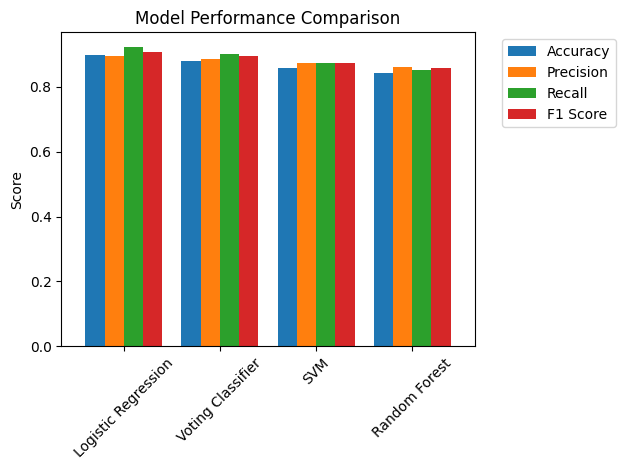

In [ ]:
## 4. Model Comparison
print("\n=== Model Performance Comparison ===")

# Create comparison dataframe
comparison_df = pd.DataFrame.from_dict(results, orient='index')
comparison_df = comparison_df.sort_values(by='F1 Score', ascending=False)

# Display comparison
print(comparison_df)

# Visual comparison
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(12, 6))
comparison_df[metrics_to_plot].plot(kind='bar', width=0.8)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


=== Feature Importance from Random Forest ===
              Feature  Importance
14        ST_Slope_Up    0.168069
4               MaxHR    0.121760
13      ST_Slope_Flat    0.116346
5             Oldpeak    0.104693
12   ExerciseAngina_Y    0.083829
0                 Age    0.083819
2         Cholesterol    0.080560
1           RestingBP    0.071634
7   ChestPainType_ATA    0.037075
6               Sex_M    0.034274


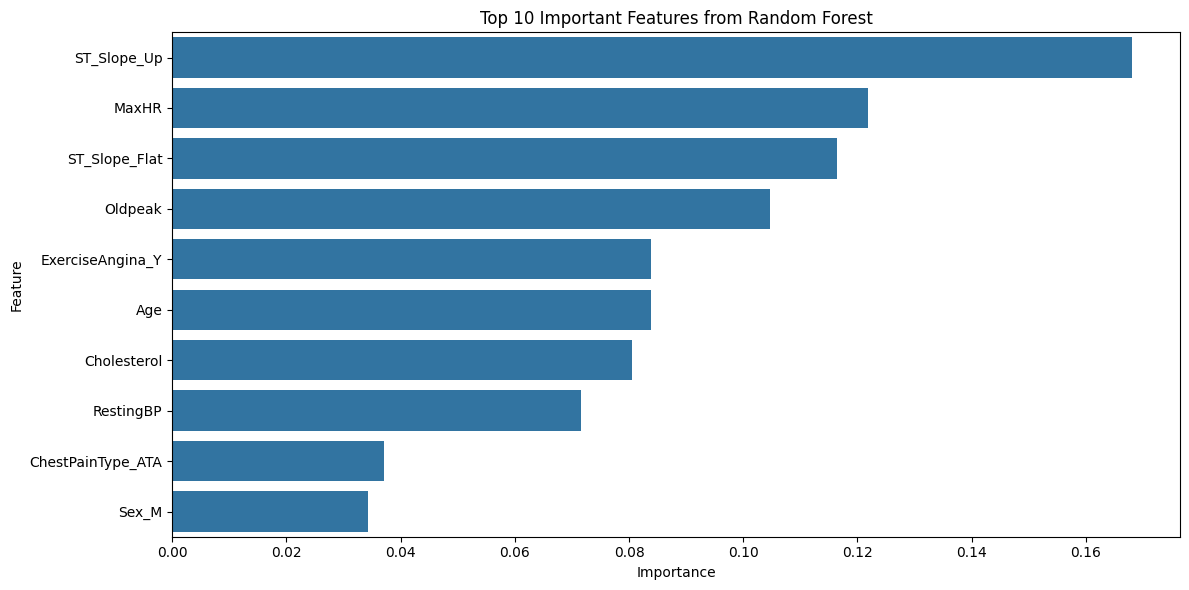

In [ ]:
## 5. Feature Importance (for Random Forest)
print("\n=== Feature Importance from Random Forest ===")

if hasattr(models["Random Forest"], 'feature_importances_'):
    importances = models["Random Forest"].feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print(feature_importance.head(10))

    # Plot top 10 features
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
    plt.title('Top 10 Important Features from Random Forest')
    plt.tight_layout()
    plt.show()

**Task -4**

In [ ]:
#  Model Definitions with Hyperparameter Grids
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    "SVM": {
        "model": SVC(probability=True, random_state=42),
        "params": {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    "Neural Network": {
        "model": MLPClassifier(max_iter=1000, random_state=42),
        "params": {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001]
        }
    }
}

In [ ]:
##  Model Training with Hyperparameter Tuning
results = {}
best_models = {}

print("=== Model Training with Hyperparameter Tuning ===")
for name, config in models.items():
    print(f"\nTraining {name}...")


    grid = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)


    best_model = grid.best_estimator_
    best_models[name] = best_model


    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        'PR AUC': average_precision_score(y_test, y_prob) if y_prob is not None else None,
        'Best Params': grid.best_params_
    }

    results[name] = metrics

    # Print results
    print(f"\n{name} Best Parameters: {grid.best_params_}")
    print(f"{name} Performance:")
    print(classification_report(y_test, y_pred))

=== Model Training with Hyperparameter Tuning ===

Training Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


Training Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        82
           1       0.87      0.88      0.87       102

    accuracy                      

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#performance comparison table
print("\n===  Performance Comparison table ===")


comparison_df = pd.DataFrame.from_dict(results, orient='index')
comparison_df = comparison_df.sort_values(by='F1 Score', ascending=False)
comparison_df = pd.DataFrame.from_dict(results, orient='index')


metrics_to_display = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC', 'Best Params']
comparison_df = comparison_df[metrics_to_display]

numeric_cols = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC']
comparison_df[numeric_cols] = comparison_df[numeric_cols].round(2)

comparison_df = comparison_df.sort_values(by='F1 Score', ascending=False)


print(comparison_df.to_markdown(tablefmt="grid", stralign="center", numalign="center"))


comparison_df.to_csv("model_performance_comparison.csv")


def color_highlights(val):
    color = 'green' if val > comparison_df['F1 Score'].quantile(0.75) else 'black'
    return f'color: {color}'

styled_df = comparison_df.style\
    .applymap(color_highlights, subset=['F1 Score'])\
    .format("{:.2f}", subset=numeric_cols)\
    .set_caption("Model Performance Comparison (Green = Top 25% F1 Scores)")

display(styled_df)



===  Performance Comparison table ===
+---------------------+------------+-------------+----------+------------+-----------+----------+-----------------------------------------------------------------------+
|                     |  Accuracy  |  Precision  |  Recall  |  F1 Score  |  ROC AUC  |  PR AUC  |                              Best Params                              |
+=====================+============+=============+==========+============+===========+==========+=======================================================================+
| Logistic Regression |    0.88    |    0.89     |   0.89   |    0.89    |   0.93    |   0.94   |           {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}            |
+---------------------+------------+-------------+----------+------------+-----------+----------+-----------------------------------------------------------------------+
|    Random Forest    |    0.86    |    0.87     |   0.88   |    0.87    |   0.93    |   0.92   |   {'max_depth

<ipython-input-39-2115055c412c>:30: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_highlights, subset=['F1 Score'])\


,Accuracy,Precision,Recall,F1 Score,ROC AUC,PR AUC,Best Params
Logistic Regression,0.88,0.89,0.89,0.89,0.93,0.94,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}"
Random Forest,0.86,0.87,0.88,0.87,0.93,0.92,"{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}"
SVM,0.86,0.87,0.87,0.87,0.93,0.94,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
Neural Network,0.84,0.87,0.84,0.86,0.91,0.91,"{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}"
